## General Non-Linear Schrodinger Equation (NLSE) 
Models passive propagation of light in a nonlinear medium.

$$ \frac{\partial A}{\partial z} = -i \frac{\beta_{2+}}{2}\frac{\partial^2 A}{\partial T^2} + i\gamma|A|^2A$$

A is the carrier envelope. We assume there is no forward-backward interaction (i.e. $\frac{\partial^2 A}{\partial z^2} \simeq 0$). $\beta$ accounts for the dispersion which is nothting other than the frequency dependant propagation constant. 

$$\beta(\omega) = n(\omega) \frac{\omega}{c} $$

We approximate as a taylor series in $\omega$. When considering the envelope $A$, we ignore $\beta_0$ (phase constant) and $\beta_1$ (group delay). hence the $\beta_{2+}$

$\gamma$ is for the Kerr non-linearity based on material index $n_2$ and effective NL area of waveguide.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
nt = 1024            # Number of time points
tmax = 20              # Max time window
dt = 2 * tmax / nt     # Time step 
t = np.linspace(-tmax, tmax, nt)

dz = 0.01              # Step size in z
nz = 1000              # Number of z steps

# Frequency domain
w = 2 * np.pi * np.fft.fftfreq(nt, d=dt)

# Physical parameters
beta2 = -1    # Dispersion coefficient (beta_2 < 0 for anomalous dispersion)
beta3 = 0     # Distorts pulse
gamma = 1     # Nonlinearity coefficient (will eventually write in terms of A_eff, n_2, ...)


## Split-Step Fourier Method 
Pretend dispersion effect and NL effect happen individually. 
$$\frac{\partial A}{\partial z} = (\hat L + \hat N)A $$


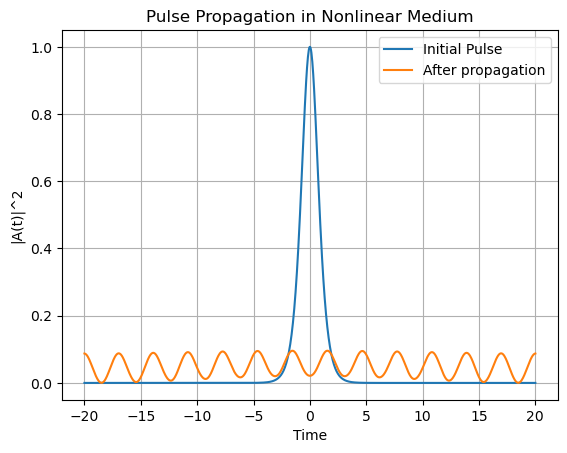

In [8]:
# Initial condition: Sech pulse (sech is better for Kerr medium??)
A0 = 1/np.cosh(t)

# Allocate array
A = A0.copy()

# Precompute some terms
dispersion = np.exp(-0.5j * beta2 * w**2 * dz - (1j/6) * beta3 * w**3 * dz ) #for dispersion (taylor series...)

#SSFM
for _ in range(nz):
    A = np.fft.ifft(np.fft.fft(A) * dispersion)   # Linear step (half-step)
    A = np.exp(1j * gamma * np.abs(A)**2 * dz) * A      # Nonlinear step
    A = np.fft.ifft(np.fft.fft(A) * dispersion)   # Linear step (half-step)
# Plots
plt.figure()
plt.plot(t, np.abs(A0)**2, label='Initial Pulse')
plt.plot(t, np.abs(A)**2, label='After propagation')
plt.xlabel('Time')
plt.ylabel('|A(t)|^2')
plt.legend()
plt.title('Pulse Propagation in Nonlinear Medium')
plt.grid()
plt.show()